In [1]:
# !pip install matplotlib
# !pip install seaborn

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns

# Dataset of Top 1000 Grossing Movies <img src = 'movies.jpg'>

## Read CSV data

In [10]:
movies = pd.read_csv('../../files/highest_grossing_movies.csv', sep=',')
display(movies)
movies.shape #(918,11)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


(918, 11)

## Data Wrangling

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Release Date                800 non-null    object
 4   Domestic Sales (in $)       918 non-null    int64 
 5   International Sales (in $)  918 non-null    int64 
 6   World Sales (in $)          918 non-null    int64 
 7   Genre                       918 non-null    object
 8   Movie Runtime               918 non-null    object
 9   License                     744 non-null    object
dtypes: int64(3), object(7)
memory usage: 78.9+ KB


In [81]:
#Changing some data types
movies['Release Date'] = pd.to_datetime(movies['Release Date'])
movies.info()
#--------------------------------------
#Change Movie Runtime to numeric
# The 'Movie Runtime' column is of type string. Let's change it to numeric values
# runtime = movies['Movie Runtime'].str.split(expand = True).iloc[:, [0, 2]]
# runtime = runtime.fillna(0)
# runtime = runtime.astype('int64')
# movies['Movie Runtime'] = runtime[0] + runtime[2]/60
# movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                918 non-null    object        
 1   Movie Info           918 non-null    object        
 2   Distributor          918 non-null    object        
 3   Release Date         800 non-null    datetime64[ns]
 4   Domestic Sales       918 non-null    int64         
 5   International Sales  918 non-null    int64         
 6   World Sales          918 non-null    int64         
 7   Genre                918 non-null    object        
 8   Movie Runtime        918 non-null    float64       
 9   License              744 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 78.9+ KB


## Renaming some columns to make access easier

In [23]:
# Renaming some columns
movies.rename(columns = {'Domestic Sales (in $)': 'Domestic Sales',
                     'International Sales (in $)': 'International Sales',
                     'World Sales (in $)': 'World Sales'}, inplace = True)
display(movies)

,Title,Movie Info,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2.300000,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3.016667,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2.700000,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2.233333,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2.483333,NaN
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,2004-06-25,81001787,36813370,117815157,"['Drama', 'Romance']",2.050000,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,2001-12-21,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1.366667,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2.216667,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,2003-10-17,80571655,26792250,107363905,"['Crime', 'Horror']",1.633333,R


### Display all column names

In [25]:
display(movies.keys())

Index(['Title', 'Movie Info', 'Distributor', 'Release Date', 'Domestic Sales',
       'International Sales', 'World Sales', 'Genre', 'Movie Runtime',
       'License'],
      dtype='object')

## Removing duplicate rows and unnecessary column: "Unnamed"

In [14]:
# Removing duplicate rows
movies.drop_duplicates(inplace = True)
# Removing the unnecessary column 'Unnamed: 0'
movies.drop('Unnamed: 0', axis = 1, inplace = True)
display(movies)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [34]:
#After cleaning up some data lets look at some statistics about it..
display(movies.describe())



object_column_desc = movies.describe(include = ['object'])
print(f'Here is the description of columns of type object:\n')
display(object_column_desc)

,Domestic Sales,International Sales,World Sales,Movie Runtime
count,9.180000e+02,9.180000e+02,9.180000e+02,918.000000
mean,1.677469e+08,2.301434e+08,3.968668e+08,1.942847
std,1.040360e+08,2.176011e+08,3.082629e+08,0.347929
min,8.036084e+07,2.600000e+02,8.160000e+07,1.266667
25%,1.016071e+08,8.845620e+07,2.005564e+08,1.666667
50%,1.321351e+08,1.638819e+08,3.019416e+08,1.916667
75%,1.913905e+08,2.885577e+08,4.750718e+08,2.166667
max,9.366622e+08,2.086739e+09,2.847246e+09,3.350000


Here is the description of columns of type object:



,Title,Movie Info,Distributor,Genre,License
count,918,918,918,918,744
unique,918,918,34,309,4
top,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Warner Bros.,"['Action', 'Adventure', 'Sci-Fi']",PG-13
freq,1,1,158,56,363


In [35]:
movies.describe(include = ['object']).iloc[2, [2, 3, 4]].to_frame().rename(columns = {'top': 'Mode'})

,Mode
Distributor,Warner Bros.
Genre,"['Action', 'Adventure', 'Sci-Fi']"
License,PG-13


In [49]:
dist_value = movies['Distributor'].to_frame()
# display(dist_value)
#-----------------------------------------------
movies['Distributor']
#-------------------------------------------------
#Diplaying a set value of Distributors and resetting the index
distrib_count = dist_value.drop_duplicates().reset_index(drop=True)
display(distrib_count)

,Distributor
0,Walt Disney Studios Motion Pictures
1,Twentieth Century Fox
2,Sony Pictures Entertainment (SPE)
3,Paramount Pictures
4,Universal Pictures
5,Warner Bros.
6,DreamWorks Distribution
7,Lionsgate
8,DreamWorks
9,New Line Cinema


In [98]:
#Displaying
creator_table = movies[ ['Distributor','Title','World Sales','Domestic Sales','International Sales'] ]
# new_creator_table = creator_table['Distributor'].drop_duplicates()
display(creator_table)

,Distributor,Title,World Sales,Domestic Sales,International Sales
0,Walt Disney Studios Motion Pictures,Star Wars: Episode VII - The Force Awakens (2015),2069521700,936662225,1132859475
1,Walt Disney Studios Motion Pictures,Avengers: Endgame (2019),2797501328,858373000,1939128328
2,Twentieth Century Fox,Avatar (2009),2847246203,760507625,2086738578
3,Walt Disney Studios Motion Pictures,Black Panther (2018),1347597973,700426566,647171407
4,Walt Disney Studios Motion Pictures,Avengers: Infinity War (2018),2048359754,678815482,1369544272
...,...,...,...,...,...
913,New Line Cinema,The Notebook (2004),117815157,81001787,36813370
914,Paramount Pictures,Jimmy Neutron: Boy Genius (2001),102992536,80936232,22056304
915,Sony Pictures Entertainment (SPE),Eat Pray Love (2010),204594016,80574010,124020006
916,New Line Cinema,The Texas Chainsaw Massacre (2003),107363905,80571655,26792250


# Telling a story with data...
The story this vizualization will tell is about movie distribution companies and the trend of their sales.
-

In [59]:
#Doing a check to see if all values match up
# def sales_sum(tab):
#     domestic = tab['Domestic Sales']
#     inter = tab['International Sales']
#     whole = tab['World Sales']
#     total = domestic + inter
#     if whole == total:
#         return 'Table is clean'
#     else:
#         return 'World Sales values aren\'t correct.'
# creator_table.apply(sales_sum)

# creator_table['Total Sales'] = creator_table['International Sales'] + creator_table['Domestic Sales']
# display(creator_table)

In [108]:
#putting distributors in order based on most to least sales
#  pd. DataFrame. sort_values(column, ascending=False)
creator_table.sort_values('World Sales', ascending=False)
display(creator_table)

,Distributor,Title,World Sales,Domestic Sales,International Sales
0,Walt Disney Studios Motion Pictures,Star Wars: Episode VII - The Force Awakens (2015),2069521700,936662225,1132859475
1,Walt Disney Studios Motion Pictures,Avengers: Endgame (2019),2797501328,858373000,1939128328
2,Twentieth Century Fox,Avatar (2009),2847246203,760507625,2086738578
3,Walt Disney Studios Motion Pictures,Black Panther (2018),1347597973,700426566,647171407
4,Walt Disney Studios Motion Pictures,Avengers: Infinity War (2018),2048359754,678815482,1369544272
...,...,...,...,...,...
913,New Line Cinema,The Notebook (2004),117815157,81001787,36813370
914,Paramount Pictures,Jimmy Neutron: Boy Genius (2001),102992536,80936232,22056304
915,Sony Pictures Entertainment (SPE),Eat Pray Love (2010),204594016,80574010,124020006
916,New Line Cinema,The Texas Chainsaw Massacre (2003),107363905,80571655,26792250


In [109]:
# display(movies)
clean_creator_table = creator_table.groupby('Distributor').sum().sort_values('World Sales', ascending=False).reset_index()
display(clean_creator_table)

,Distributor,World Sales,Domestic Sales,International Sales
0,Walt Disney Studios Motion Pictures,82372098598,34098331657,48781958509
1,Warner Bros.,63597493931,25891722993,37741574581
2,Twentieth Century Fox,48588894179,19114852793,29338267462
3,Universal Pictures,45602644818,19316009134,26232717142
4,Sony Pictures Entertainment (SPE),37456488081,15764875138,21691612943
5,Paramount Pictures,32443523480,14484465716,18238306006
6,DreamWorks,10412975902,4040554079,6372421823
7,Lionsgate,7498505934,3424851174,4164163096
8,New Line Cinema,7066345995,3454990873,3611355122
9,DreamWorks Distribution,5814639953,2728573687,3086066266


## Top 5 Highest Grossing Movie Distribution companies:

In [76]:
#showing top 5 money making movie Distributors based on World sales (domestic sales + international sales)

display(clean_creator_table.head(5))


,Distributor,World Sales,Domestic Sales,International Sales
0,Walt Disney Studios Motion Pictures,82372098598,34098331657,48781958509
1,Warner Bros.,63597493931,25891722993,37741574581
2,Twentieth Century Fox,48588894179,19114852793,29338267462
3,Universal Pictures,45602644818,19316009134,26232717142
4,Sony Pictures Entertainment (SPE),37456488081,15764875138,21691612943


Text(0.5, 1.0, 'Top Distributors per World Sales')

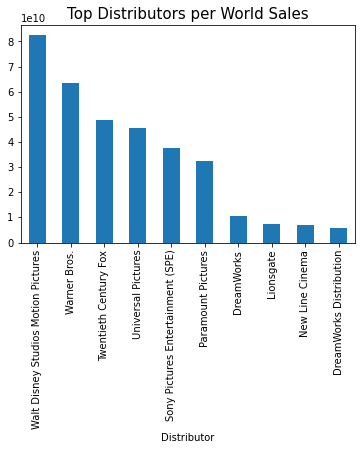

In [120]:
movies.groupby('Distributor').sum()['World Sales'].sort_values(ascending=False).head(10).plot.bar()
plt.title('Top Distributors per World Sales', fontsize=15, color='k')

Distributor rankings based on overall sales in billions



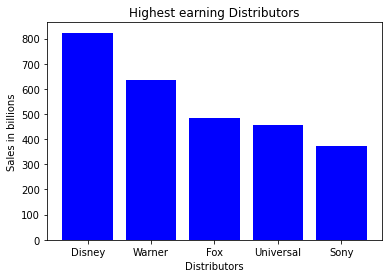

In [144]:
#showing a visual af above data...
print('Distributor rankings based on overall sales in billions\n')
x = np.array(["Disney","Warner","Fox","Universal","Sony"])
y = np.array([823,635,485,456,374])
plt.bar(x, y, color = "blue")
plt.title('Highest earning Distributors')
plt.xlabel('Distributors')
plt.ylabel('Sales in billions')
plt.show()



In [118]:
#Each companies top 5 selling films based on world sales
print("Disneys' top grossing movies")
get_movie = movies[ ["Distributor", "Title","World Sales"] ]
# display(get_movie)
print('Top ten highest grossing movies overall\n')
top_5 = get_movie.sort_values("World Sales", ascending=False)
display(top_5.head(10).reset_index(drop=True))
#First well find Disneys's Top 5 best selling films
# disney_top = get_movie.groupby(['Distributor']).
# disney_top = get_movie.groupby(get_movie['Distributor']).sum().sort_values('World Sales', ascending=False).reset_index()



Disneys' top grossing movies
Top ten highest grossing movies overall



,Distributor,Title,World Sales
0,Twentieth Century Fox,Avatar (2009),2847246203
1,Walt Disney Studios Motion Pictures,Avengers: Endgame (2019),2797501328
2,Paramount Pictures,Titanic (1997),2201647264
3,Walt Disney Studios Motion Pictures,Star Wars: Episode VII - The Force Awakens (2015),2069521700
4,Walt Disney Studios Motion Pictures,Avengers: Infinity War (2018),2048359754
5,Universal Pictures,Jurassic World (2015),1670516444
6,Walt Disney Studios Motion Pictures,The Lion King (2019),1662899439
7,Sony Pictures Entertainment (SPE),Spider-Man: No Way Home (2021),1544455963
8,Walt Disney Studios Motion Pictures,The Avengers (2012),1518815515
9,Universal Pictures,Furious 7 (2015),1515341399


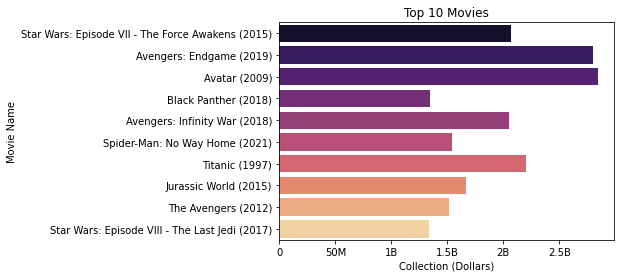

In [145]:
#I eliminated some words from this title because it appears to be too long and takes up too much room.
movies['Title'].replace({'Star Wars: Episode VII - The Force Awakens ':'Star Wars: Episode VII'},inplace = True)

sns.barplot(x='World Sales',y='Title',data = movies.head(10),palette='magma')
plt.ylabel('Movie Name')
plt.xlabel('Collection (Dollars)')
plt.title('Top 10 Movies')
plt.xticks([0,2500000000,2000000000,1500000000,1000000000,500000000], ['0',"2.5B",'2B','1.5B','1B','50M'])
plt.show()

Index(['Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Twentieth Century Fox', 'Universal Pictures',
       'Sony Pictures Entertainment (SPE)', 'Paramount Pictures', 'DreamWorks',
       'Lionsgate', 'New Line Cinema', 'DreamWorks Distribution'],
      dtype='object', name='Distributor')


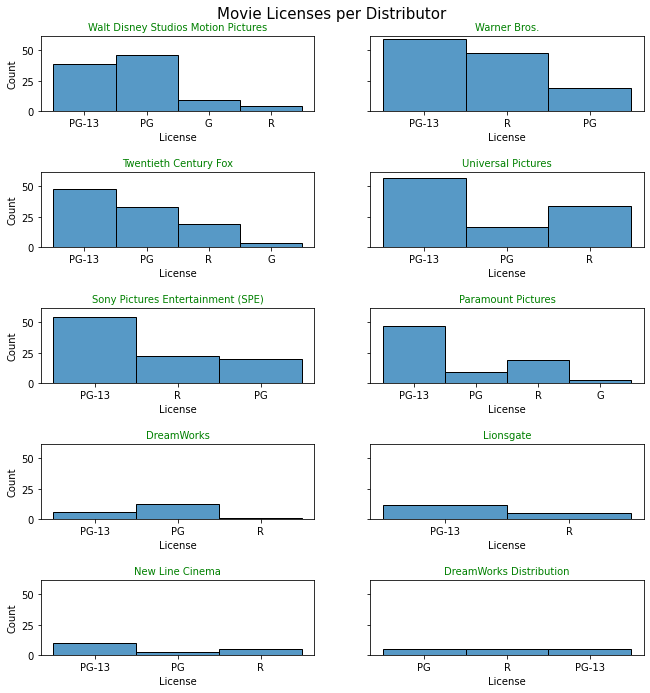

<Figure size 864x864 with 0 Axes>

In [128]:
def DistributorLicense(movies):
    
    Distributors = movies.groupby('Distributor').sum()['World Sales'].sort_values(ascending=False).head(10).keys()
    print(Distributors)
    
    
    fig, axes = plt.subplots(5, 2, figsize=(10, 10), sharey=True)
    j=0
    k =0
    plt.figure(figsize=(12,12))
    fig.tight_layout(pad=4.0)
    fig.suptitle('Movie Licenses per Distributor', fontsize=15, color='k')
    
    for i in Distributors:
        data = movies.loc[movies['Distributor']==i,:]
        sns.histplot(ax=axes[j,k],x='License', data=data)
        axes[j,k].set_title(i,fontsize=10, color='g')
        k+=1
        if k>1:
            k=0
            j+=1
DistributorLicense(movies)

# Cleaning up graphs to display data

<AxesSubplot:>

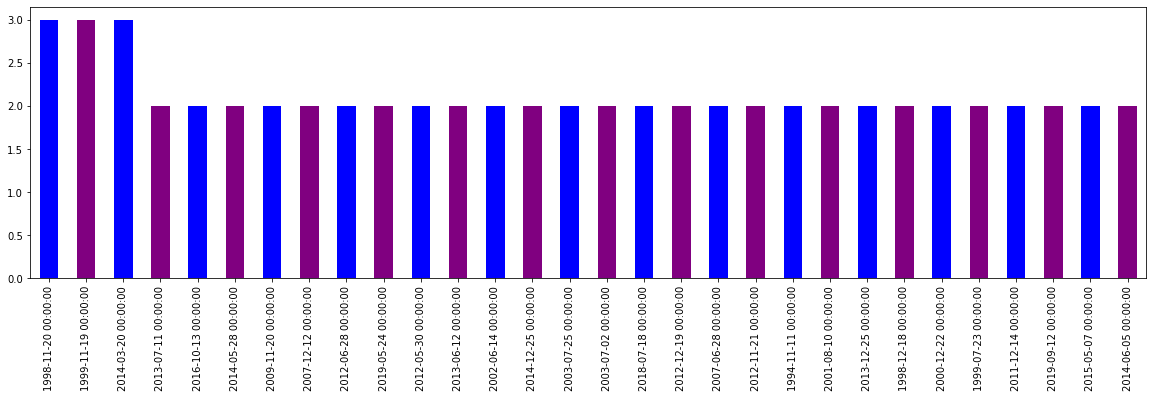

In [137]:
plt.figure(figsize=(20,5))
movies['Release Date'].value_counts()
movies['Release Date'].value_counts().nlargest(30).plot.bar(color=['blue','purple'])

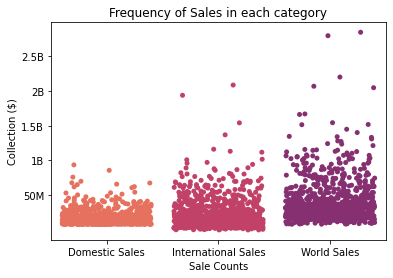

In [147]:
#How often do sales occur in each category?

#Creating a new dataframe with only the columns required for visualisation
new_df = movies.drop(movies.columns[[0,1,2,3,7,8,9]],axis = 1)

sns.stripplot(data = new_df,jitter = 0.4,dodge = True,palette='flare')
plt.xlabel("Sale Counts")
plt.ylabel("Collection ($)")
plt.title('Frequency of Sales in each category')
plt.yticks([2500000000,2000000000,1500000000,1000000000,500000000], ["2.5B",'2B','1.5B','1B','50M'])
plt.show()

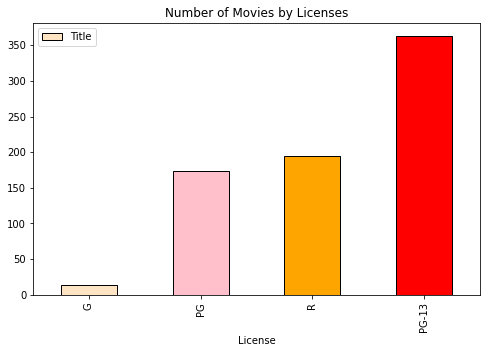

In [150]:
color=['bisque','pink','orange','red']
movies.dropna(subset=['License']).groupby('License',as_index=False)['Title'].count().sort_values('Title').plot.bar(
    x='License', y='Title',color=color, edgecolor='black', figsize=(8,5),
    title='Number of Movies by Licenses');